In [1]:
import pandas as pd
import igraph as ig
from ipysigma import Sigma
import glob
import json
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
edgelist = pd.DataFrame(columns=['forward_from','forward_to','count'])

for path in glob.glob('../*_edgelist/*edgelist*.csv'):
    df = pd.read_csv(path)
    edgelist = pd.concat([edgelist,df])

In [3]:
## load it into igraph
G = ig.Graph.TupleList(edgelist.itertuples(index=False), directed=True, weights=True)

In [4]:
## community detection
communities = G.as_undirected().community_leiden(objective_function="modularity")

## add community as node label
G.vs['community'] = communities.membership

In [5]:
with open('../dictionaires/id_to_desc.json') as file_desc,\
    open('../dictionaires/id_to_names.json') as file_names:
    id_to_desc = json.load(file_desc)
    id_to_names = json.load(file_names)

In [6]:
id_to_names_int = dict(map(lambda x: (int(x[0]),x[1]), id_to_names.items()))
id_to_desc_int = dict(map(lambda x: (int(x[0]),x[1]), id_to_desc.items()))

In [7]:
G.vs['label'] = list(map(lambda x: id_to_names_int.get(x,x),G.vs['name']))
G.vs['desc'] = list(map(lambda x: id_to_desc_int.get(x,x),G.vs['name']))

In [8]:
Sigma(G, node_size=G.degree(mode='out'),
      node_color=G.vs['community'], 
      hide_edges_on_move=True,
      node_color_gradient='Viridis', node_label=G.vs['label'],
     layout_settings = {"barnesHutOptimize":False,
                       'gravity': 0.1})

Sigma(ig.Graph with 3,616 nodes and 9,240 edges)

In [10]:
max(communities.membership)
#twelve communities

11

In [11]:
dict_degree = Counter(G.degree())
dict_degree_in = Counter(G.indegree())
dict_degree_out = Counter(G.outdegree())

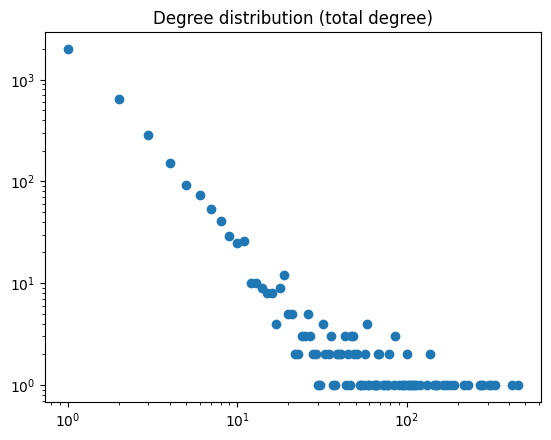

In [14]:
plt.scatter(dict_degree.keys(), dict_degree.values())
plt.xscale('log')
plt.yscale('log')
plt.title('Degree distribution (total degree)')
plt.show()

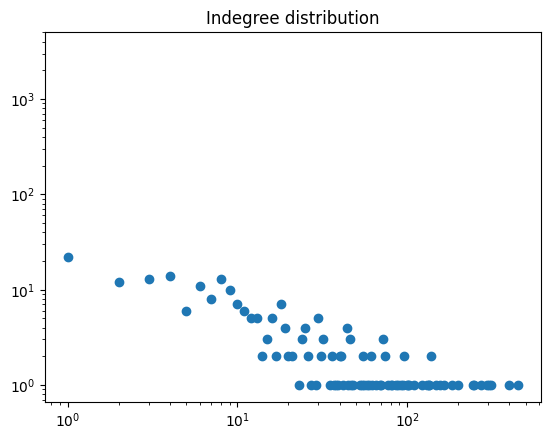

In [15]:
plt.scatter(dict_degree_in.keys(), dict_degree_in.values())
plt.xscale('log')
plt.yscale('log')
plt.title('Indegree distribution')
plt.show()

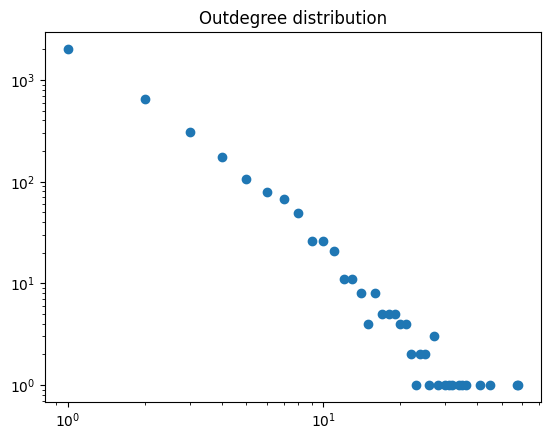

In [16]:
plt.scatter(dict_degree_out.keys(), dict_degree_out.values())
plt.xscale('log')
plt.yscale('log')
plt.title('Outdegree distribution')
plt.show()

In [20]:
sorted(list(zip(G.vs['label'],G.vs.outdegree())), key=lambda x: x[1], reverse=True)

[('CasaPound Italia ufficiale', 58),
 ('Blocco Studentesco', 57),
 ('/CIG/ Telegram | Counter Intelligence Global', 45),
 ('Bellum Acta - Intel, Urgent News and Archives', 41),
 ('Disclose.tv', 36),
 ('Middle East Spectator', 35),
 ('Keith Woods', 34),
 ('Rerum Novarum // Intelligence, Breaking News, and Alerts', 32),
 ('Zentropa', 31),
 ('𝐀 𝐑 𝐂 𝐀 𝐃 𝐈 𝐀', 30),
 ('White Papers', 28),
 ('The Western Chauvinist', 27),
 ('Intel Slava Z', 27),
 ('Thuletide', 27),
 ('Blocco Studentesco Roma', 26),
 ("\U0001fa99 THE FERRYMAN'S TOLL \U0001fa99", 25),
 ('Joel Davis', 25),
 ('Red Ice TV', 24),
 ('Progetto Razzia', 24),
 ('Pox Populi', 23),
 ('Mark Collett', 22),
 ('DD Geopolitics', 22),
 ('𝐙𝖔𝖔𝖒𝖊𝖗𝐖𝖆𝖋𝖋𝖊𝖓', 21),
 ('Lebanese News and Updates', 21),
 ('Working Man Memes', 21),
 ('Arktos', 21),
 (1891165770, 20),
 ('UNN', 20),
 ('Vincent James', 20),
 ('Samurái de Occidente', 20),
 ('Laura Towler', 19),
 ('War Monitor', 19),
 ('The End Times', 19),
 ('Ultras Not Reds', 19),
 ('Imperium Press', 19),
 (

In [18]:
sorted(list(zip(G.vs['label'],G.vs.indegree())), key=lambda x: x[1], reverse=True)

[("𝔸𝕖𝕥𝕙𝕖𝕣𝕔𝕫𝕒𝕣'𝕤 𝔸𝕖𝕥𝕙𝕖𝕣𝕤𝕥𝕣𝕖𝕒𝕞", 453),
 ('No BS kNews', 401),
 ('Traditional Britain Group', 314),
 ('Lebenswert', 302),
 ('Working Man Memes', 295),
 ('Il Baule dei Meme di Letteralmente lo Sherlock Holmes della Soia', 271),
 ('The Western Chauvinist', 249),
 ('Red Ice TV', 245),
 ("Alt Skull's Charnel House", 200),
 ('/CIG/ Telegram | Counter Intelligence Global', 184),
 ('Giuseppe Masala Chili 🌶', 165),
 ('Progetto Razzia', 157),
 ('Bellum Acta - Intel, Urgent News and Archives', 149),
 ('🔥 Spicy Steamed Memeballs 🔥', 138),
 ("\U0001fa99 THE FERRYMAN'S TOLL \U0001fa99", 138),
 ('Gym XIV', 135),
 ('Advanced Institute of Esoteric Studies', 134),
 ('Sheeple Bashers', 131),
 ('Mark Collett', 122),
 ('Nativist Concern', 110),
 ('QVINTA ÆTAS', 102),
 ('𝐓𝐇𝐄 𝐖𝐇𝐈𝐓𝐄 𝐏𝐎𝐒𝐓', 101),
 ('Zentropa', 100),
 ('COLE WOLFSSON', 96),
 ('Pox Populi', 96),
 ('Great Lakes Active Club', 95),
 ('Stay Free', 92),
 ('NazBol Party Club² ☭ - Trans Pride!!! EDITION', 88),
 ('Fiorangela, canale pubblico.', 86),
 ('Te

# Let's filter for only links over 1

In [19]:
edgelist_filtered = edgelist[edgelist['count']>1]

In [27]:
## load it into igraph
G = ig.Graph.TupleList(edgelist_filtered.itertuples(index=False), directed=True, weights=True)

In [28]:
## community detection
communities = G.as_undirected().community_leiden(objective_function="modularity")

## add community as node label
G.vs['community'] = communities.membership

In [29]:
G.vs['label'] = list(map(lambda x: id_to_names_int.get(x,x),G.vs['name']))
G.vs['desc'] = list(map(lambda x: id_to_desc_int.get(x,x),G.vs['name']))

In [37]:
Sigma(G, node_size=G.degree(mode='out'),
      node_color=G.vs['community'], 
      hide_edges_on_move=True,
      node_color_gradient='Viridis', node_label=G.vs['label'],
     layout_settings = {"barnesHutOptimize":False,
                       'gravity': 0.1})

Sigma(ig.Graph with 2,047 nodes and 4,122 edges)

In [31]:
max(communities.membership)
#23 communities

23

In [32]:
dict_degree = Counter(G.degree())
dict_degree_in = Counter(G.indegree())
dict_degree_out = Counter(G.outdegree())

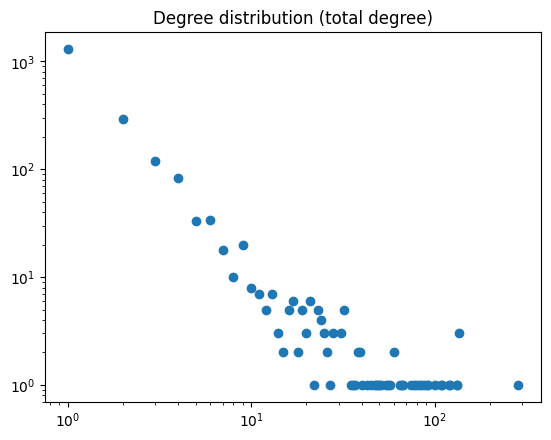

In [33]:
plt.scatter(dict_degree.keys(), dict_degree.values())
plt.xscale('log')
plt.yscale('log')
plt.title('Degree distribution (total degree)')
plt.show()

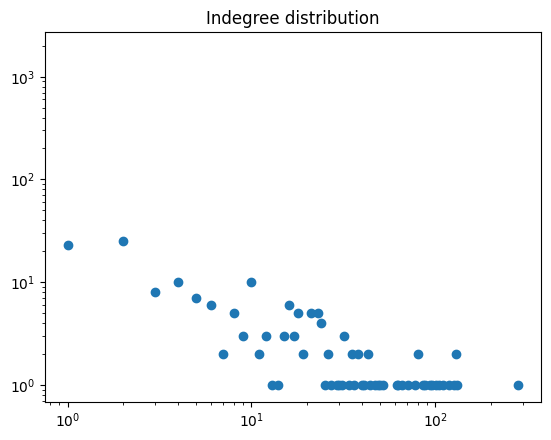

In [34]:
plt.scatter(dict_degree_in.keys(), dict_degree_in.values())
plt.xscale('log')
plt.yscale('log')
plt.title('Indegree distribution')
plt.show()

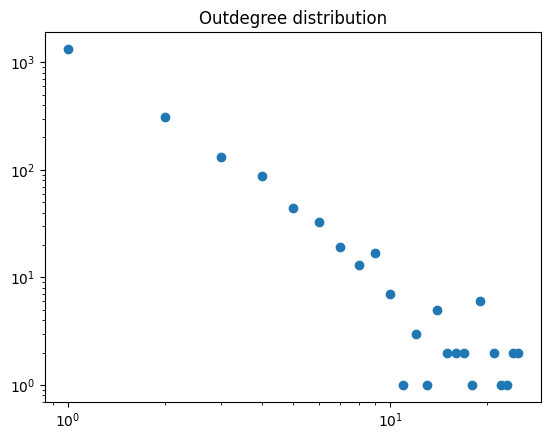

In [35]:
plt.scatter(dict_degree_out.keys(), dict_degree_out.values())
plt.xscale('log')
plt.yscale('log')
plt.title('Outdegree distribution')
plt.show()